# ✨ Intuitive + Mathematical Introduction to Kernels

## 1. The Problem: Linear vs Nonlinear Patterns

* A **linear model** only sees straight-line relations:

  $$
  f(x) = w^\top x + b
  $$
* What if $x$ and $y$ have a **nonlinear relationship** (e.g. circle, XOR)? Linear dot products can’t “see” it.

---

## 2. Feature Maps

A **kernel** is just an **inner product in some (possibly high-dimensional) feature space**:

$$
k(x, x') = \langle \phi(x), \phi(x') \rangle
$$

* $\phi: \mathbb{R}^d \to \mathcal{H}$ is a feature map (possibly infinite-dimensional).
* Instead of computing $\phi(x)$ explicitly, we use $k(x, x')$ directly (**kernel trick**).

---

## 3. Common Kernels

* **Linear kernel**:

  $$
  k(x, x') = x^\top x'
  $$

  (no new features, just dot product)

* **Polynomial kernel (degree 2)**:

  $$
  k(x, x') = (x^\top x' + c)^2
  $$

  equivalent to mapping into quadratic features $(x_1^2, \sqrt{2}x_1x_2, x_2^2, \dots)$.

* **Gaussian RBF kernel**:

  $$
  k(x, x') = \exp\!\left(-\frac{\|x-x'\|^2}{2\sigma^2}\right)
  $$

  corresponds to an **infinite-dimensional feature space** where similarity decays smoothly with distance.

---

## 4. Intuition with Plots

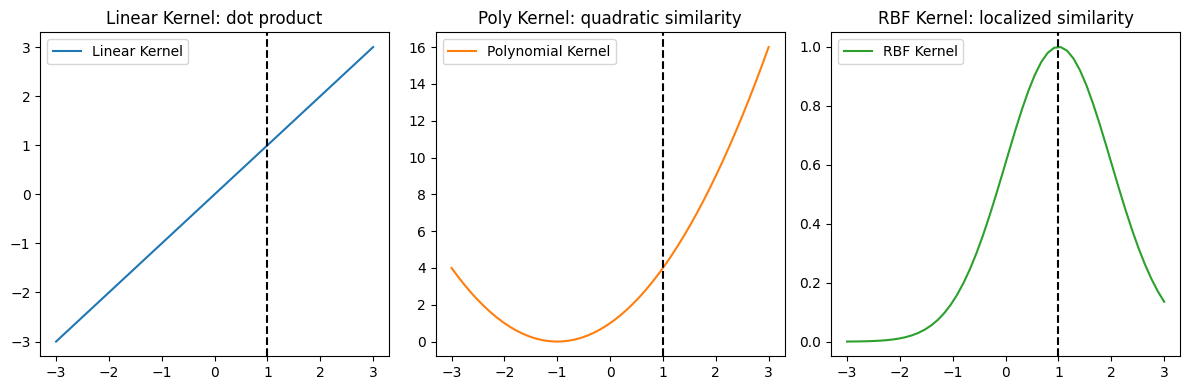

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import linear_kernel, polynomial_kernel, rbf_kernel

# Sample 1D data
X = np.linspace(-3, 3, 50).reshape(-1, 1)

# Compute kernels with a fixed reference point
x_ref = np.array([[1.0]])  

linear_vals = linear_kernel(X, x_ref).ravel()
poly_vals   = polynomial_kernel(X, x_ref, degree=2, coef0=1).ravel()
rbf_vals    = rbf_kernel(X, x_ref, gamma=0.5).ravel()

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.plot(X, linear_vals, label="Linear Kernel", color="C0")
plt.title("Linear Kernel: dot product")
plt.axvline(1.0, color="k", linestyle="--")
plt.legend()

plt.subplot(1,3,2)
plt.plot(X, poly_vals, label="Polynomial Kernel", color="C1")
plt.title("Poly Kernel: quadratic similarity")
plt.axvline(1.0, color="k", linestyle="--")
plt.legend()

plt.subplot(1,3,3)
plt.plot(X, rbf_vals, label="RBF Kernel", color="C2")
plt.title("RBF Kernel: localized similarity")
plt.axvline(1.0, color="k", linestyle="--")
plt.legend()

plt.tight_layout()
plt.show()

### 📌 What students see:

* Linear kernel: similarity grows unbounded with alignment.
* Polynomial kernel: accentuates nonlinear interactions.
* RBF kernel: measures **closeness**, giving a “bump” of similarity around the reference point.

---

## 5. Connection to HSIC

* HSIC measures dependence by embedding variables into an RKHS via kernels:

  $$
  \text{HSIC}(X, Y) = \frac{1}{n^2} \mathrm{Tr}(KHLH)
  $$

  where $K$ and $L$ are Gram matrices from kernels on $X$ and $Y$, and $H$ centers them.

* The **kernel choice** defines *what kind of dependence* HSIC can capture:

  * Linear kernel → HSIC detects only linear dependence.
  * RBF kernel → HSIC detects *any nonlinear* dependence (universal kernel).

---

# 📝 Teaching Script (Intuition)

* A **kernel** is just a **smart similarity function**.
* Kernels let us compare points **as if** we had mapped them to a higher (or infinite) dimensional space, without ever doing it explicitly.
* Different kernels give different “lenses” for measuring similarity → and thus for detecting dependence in HSIC.

# 🔲 XOR Example with Kernels

## 1. Setup

* XOR data: two features, labels $y \in \{0,1\}$.
* Linear similarity fails (points from different classes may look similar).
* Polynomial/RBF kernels “unfold” the space so XOR structure becomes visible.

---

## 2. Python Code for Visualization

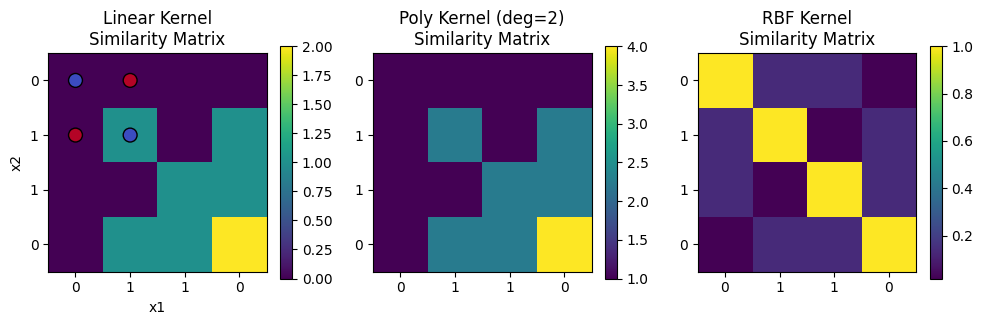

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import linear_kernel, polynomial_kernel, rbf_kernel

# ---------------------------
# Generate XOR dataset
# ---------------------------
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])  # XOR labels (class)

# Plot original XOR in input space
plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", s=100, edgecolor="k")
plt.title("XOR in Input Space")
plt.xlabel("x1"); plt.ylabel("x2")

# ---------------------------
# Compute Gram matrices
# ---------------------------
K_lin  = linear_kernel(X)
K_poly = polynomial_kernel(X, degree=2, coef0=1)
K_rbf  = rbf_kernel(X, gamma=2)

# ---------------------------
# Plot similarity matrices
# ---------------------------
for i,(K,name) in enumerate([(K_lin,"Linear Kernel"),
                             (K_poly,"Poly Kernel (deg=2)"),
                             (K_rbf,"RBF Kernel")], start=2):
    plt.subplot(1,3,i-1)
    plt.imshow(K, cmap="viridis")
    plt.colorbar()
    plt.title(name + "\nSimilarity Matrix")
    plt.xticks(range(4), y)
    plt.yticks(range(4), y)

plt.tight_layout()
plt.show()

---

## 3. What Students See

* **Linear kernel (dot product):**

  * Fails to distinguish XOR classes (similarity structure looks messy).
* **Polynomial kernel (degree 2):**

  * Captures quadratic interactions ($x_1 x_2$), reveals class separability.
* **RBF kernel:**

  * Clusters same-class points together, different-class points far apart.

---

## 4. Teaching Intuition

* In **input space**, XOR looks inseparable.
* In **feature space** induced by a kernel, XOR becomes linearly separable.
* This is the **kernel trick** in action:

  * Polynomial kernel → builds quadratic cross-terms automatically.
  * RBF kernel → measures closeness and “warps” the space so that XOR classes become separable.